In [1]:
from utils import write_loss, get_config, Timer
from trainer import MUNIT_Trainer, UNIT_Trainer
import torch.backends.cudnn as cudnn
import torch

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
import json
import numpy as np
from torch.utils.tensorboard import SummaryWriter
from fid_score import calculate_frechet_distance

from my_utils import (multiple_gpu_gen, multiple_gpu_dis,
                      load_dataset, LoaderSampler, tensor2img,
                      get_Z_pushed_loader_stats)

from IPython.display import clear_output

cudnn.benchmark = True

# Load experiment setting
opts_trainer = "MUNIT"
opts_output_path = "."
opts_resume = False
opts_config = "configs/handbags2shoes.yaml"


config = get_config(opts_config)
max_iter = config['max_iter']
display_size = config['display_size']
config['vgg_model_path'] = opts_output_path
batch_size = config['batch_size']

DEVICE_IDS = [1]
SEED = 0x000000

device = f'cuda:{DEVICE_IDS[0]}'

# Setup model and data loader
if opts_trainer == 'MUNIT':
    trainer = MUNIT_Trainer(config, device).to(device)
elif opts_trainer == 'UNIT':
    trainer = UNIT_Trainer(config).to(device)
else:
    sys.exit("Only support MUNIT|UNIT")

trainer.gen_a = multiple_gpu_gen(trainer.gen_a, DEVICE_IDS)
trainer.gen_b = multiple_gpu_gen(trainer.gen_b, DEVICE_IDS)

trainer.dis_a = multiple_gpu_dis(trainer.dis_a, DEVICE_IDS)
trainer.dis_b = multiple_gpu_dis(trainer.dis_b, DEVICE_IDS)

DATASET1, DATASET1_PATH = 'dtd', '../data/dtd/images'
DATASET2, DATASET2_PATH = 'shoes', '../data/shoes_128.hdf5'

IMG_SIZE = 128

filename = 'stats/{}_{}_test.json'.format(DATASET2, IMG_SIZE)
with open(filename, 'r') as fp:
    data_stats = json.load(fp)
    mu_data, sigma_data = data_stats['mu'], data_stats['sigma']
del data_stats

torch.cuda.set_device(device)
torch.manual_seed(SEED)
np.random.seed(SEED)

train_loader_a, test_loader_a = load_dataset(DATASET1, DATASET1_PATH,
                                             img_size=IMG_SIZE, batch_size=batch_size)
train_loader_b, test_loader_b = load_dataset(DATASET2, DATASET2_PATH,
                                             img_size=IMG_SIZE, batch_size=batch_size)

X_sampler = LoaderSampler(train_loader_a)
X_test_sampler = LoaderSampler(test_loader_a)
Y_sampler = LoaderSampler(train_loader_b)
Y_test_sampler = LoaderSampler(test_loader_b)

torch.manual_seed(0xBADBEEF)
np.random.seed(0xBADBEEF)

X_fixed_arr = []
Y_fixed_arr = []
X_test_fixed_arr = []
Y_test_fixed_arr = []
for i in range(10):
    X_fixed_arr.append(X_sampler.sample(1))
    Y_fixed_arr.append(Y_sampler.sample(1))
    X_test_fixed_arr.append(X_test_sampler.sample(1))
    Y_test_fixed_arr.append(Y_test_sampler.sample(1))

X_fixed = torch.cat(X_fixed_arr)
Y_fixed = torch.cat(Y_fixed_arr)
X_test_fixed = torch.cat(X_test_fixed_arr)
Y_test_fixed = torch.cat(Y_test_fixed_arr)

print(f"X_fixed shape = {X_fixed.shape}")
print(f"Y_fixed shape = {Y_fixed.shape}")
# Setup logger and output folders
model_name = os.path.splitext(os.path.basename(opts_config))[0]

OUTPUT_PATH = '../checkpoints/MUNIT_nips/{}_{}_{}'.format(DATASET1, DATASET2, IMG_SIZE)
writer = SummaryWriter(os.path.join(OUTPUT_PATH, "tensorboard"))
path_to_save_fig = os.path.join(OUTPUT_PATH, "figs")
if not os.path.exists(path_to_save_fig):
    os.makedirs(path_to_save_fig)

path_to_save_models = os.path.join(OUTPUT_PATH, "models")
if not os.path.exists(path_to_save_models):
    os.makedirs(path_to_save_models)

/cache/selikhanovych/ot/MUNIT_nips/utils.py:101: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  return yaml.load(stream)


Keys: <KeysViewHDF5 ['imgs']>
X_fixed shape = torch.Size([10, 3, 128, 128])
Y_fixed shape = torch.Size([10, 3, 128, 128])


In [2]:
max_iter

1000000

Plotting, step = 990001
Step 990001, gen_a2b, train


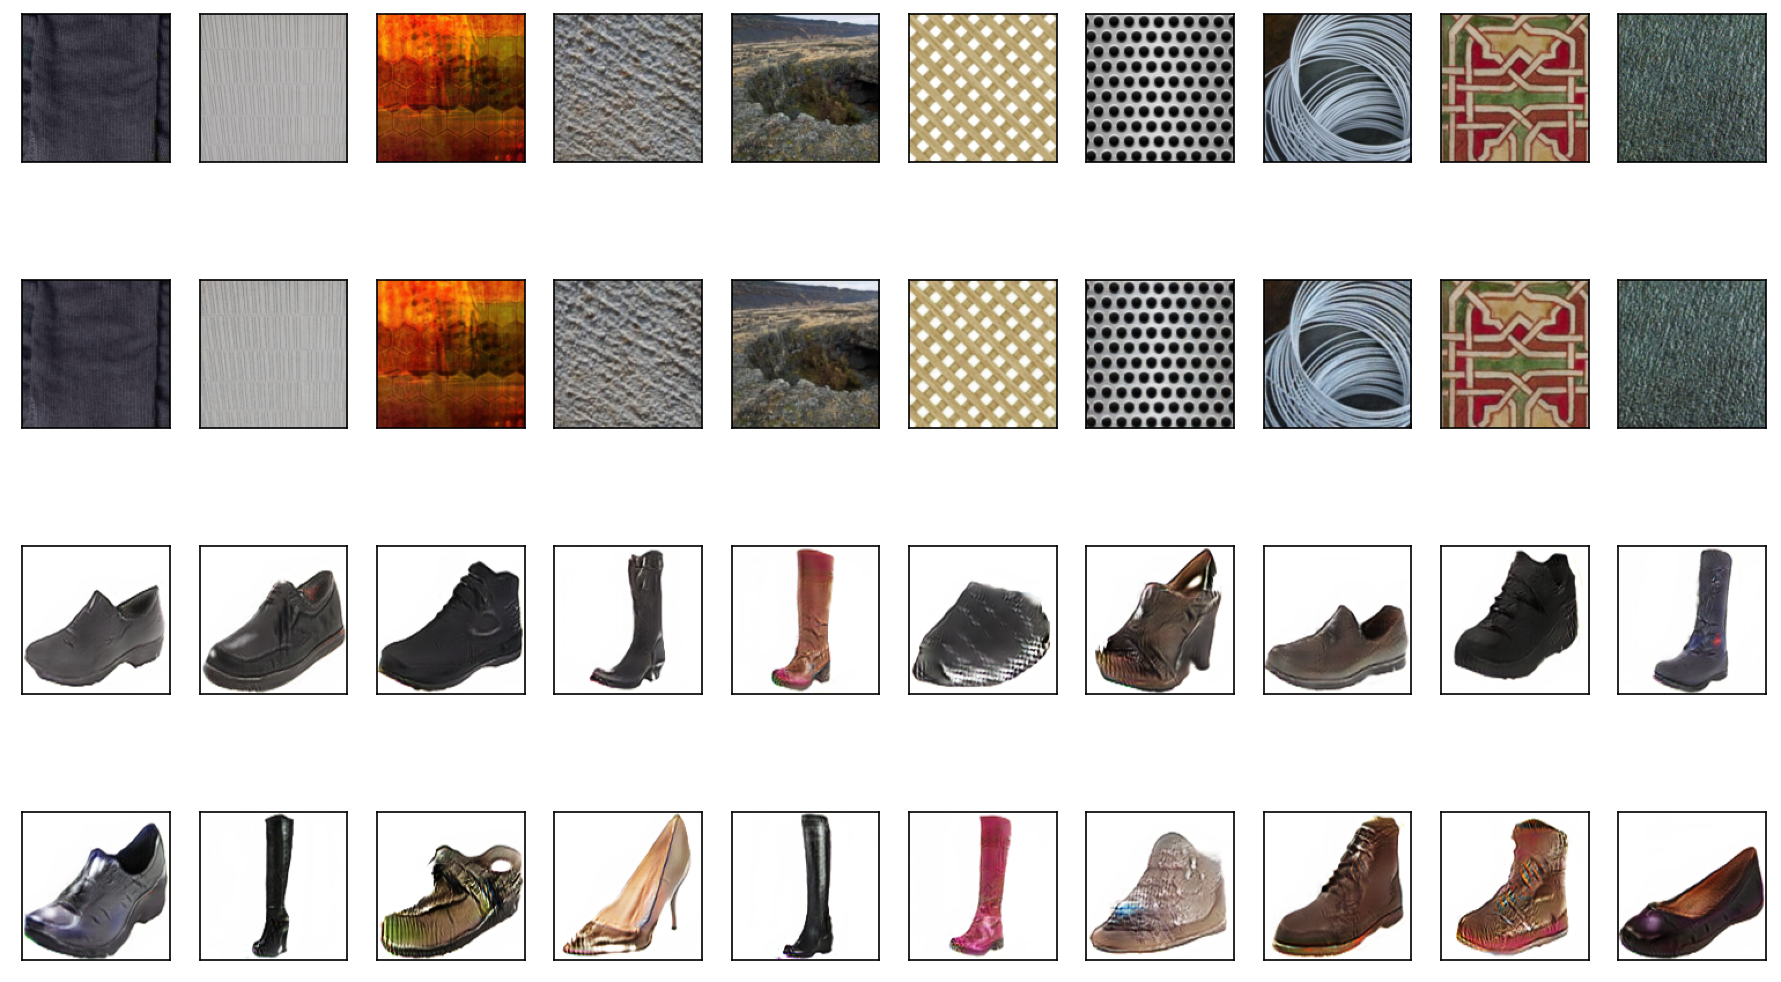

Step 990001, gen_a2b, test


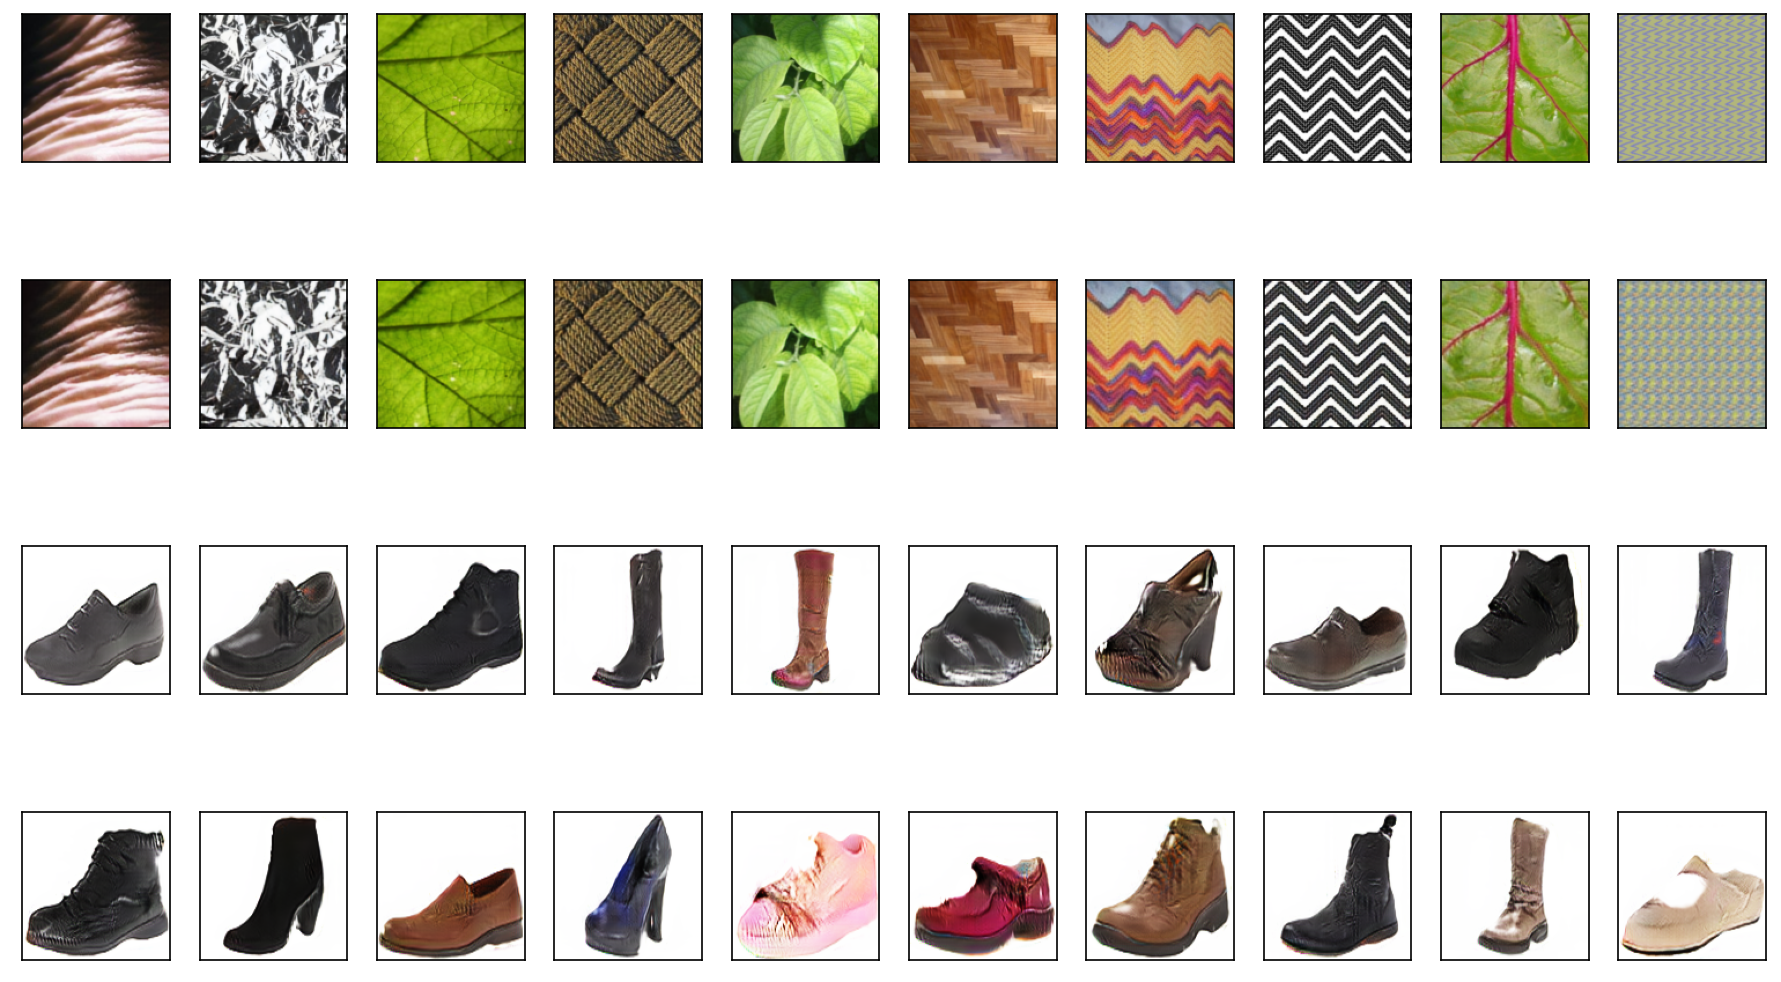

Step 990001, gen_b2a, train


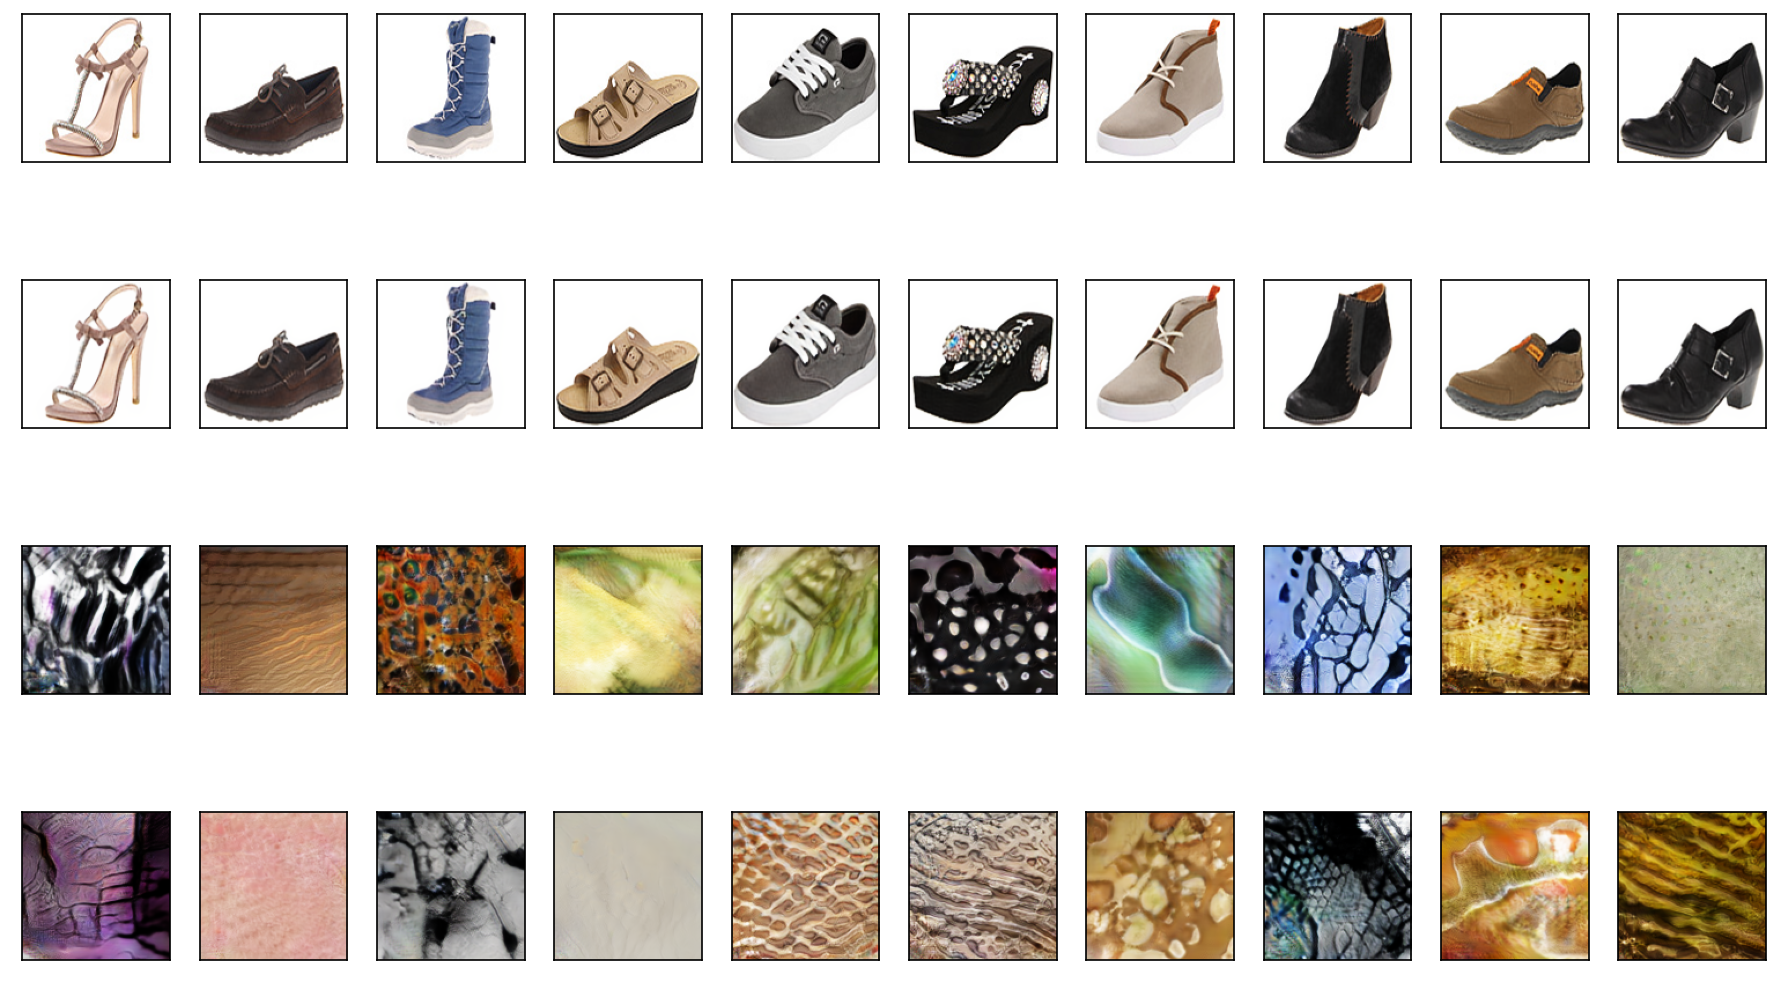

Step 990001, gen_b2a, test


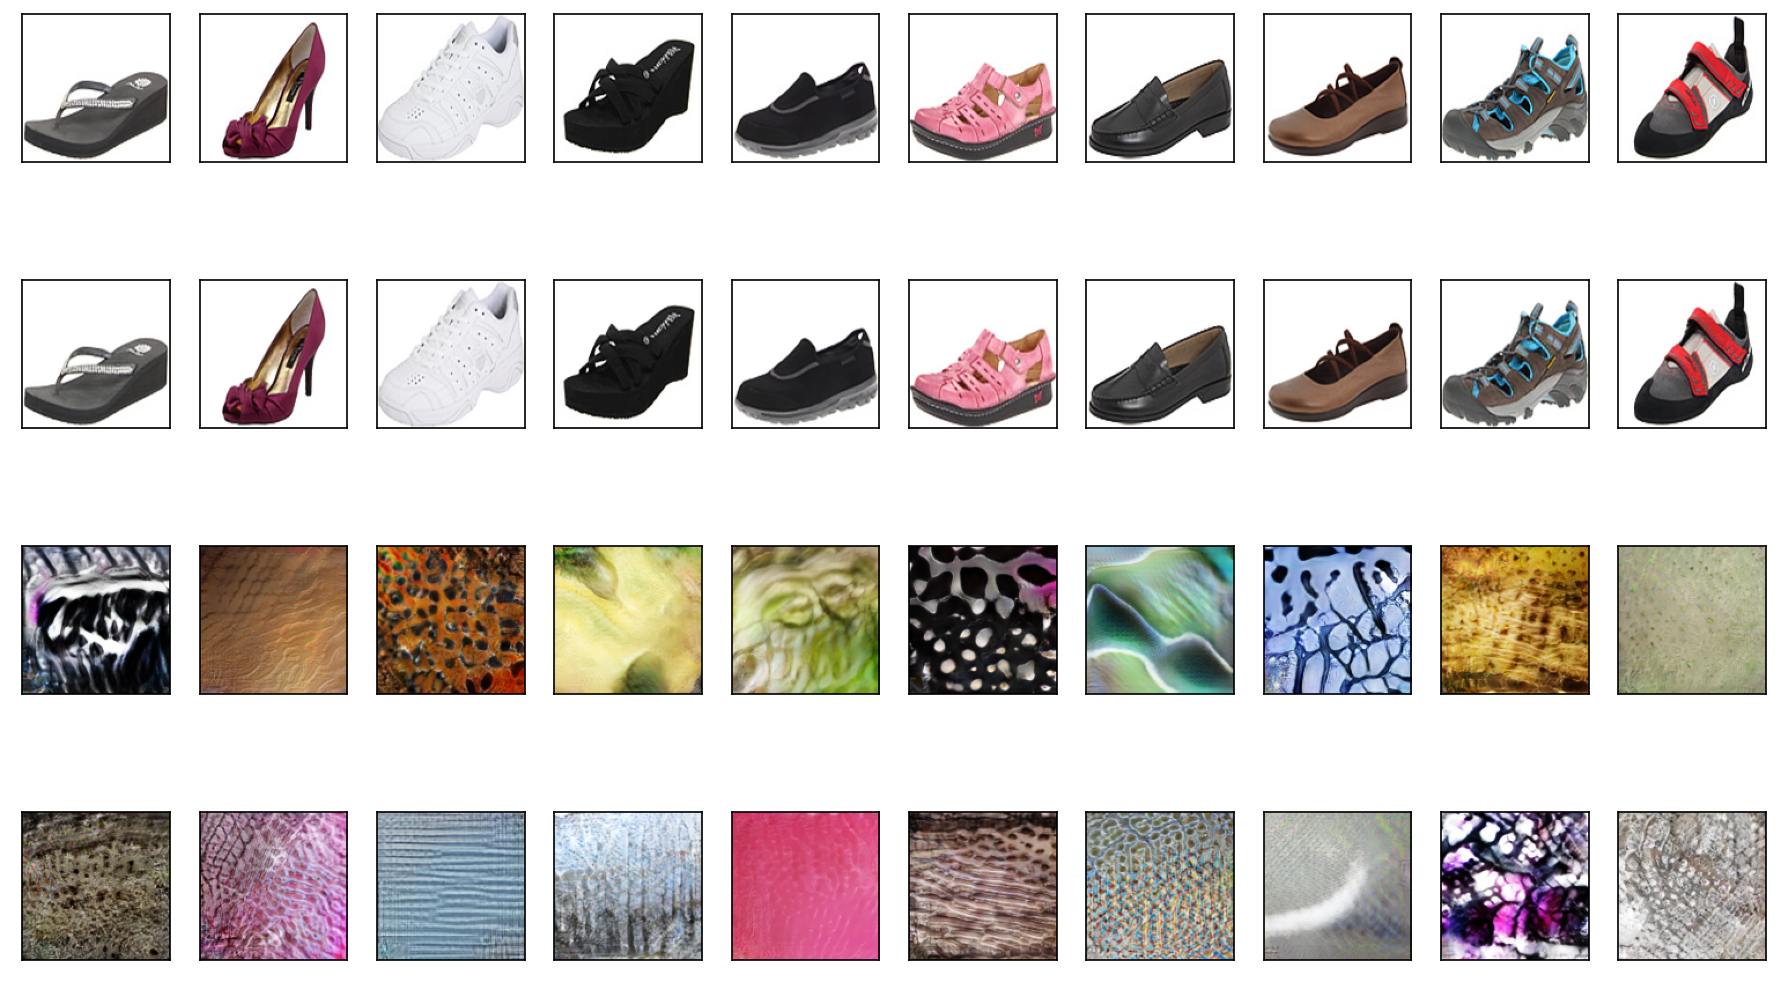

Computing FID
FID = 43.46742941948003, best_fid = 43.24361979358895, best iter = 970000
Elapsed time in update: 0.277673
Elapsed time in update: 0.125942
Elapsed time in update: 0.122205
Elapsed time in update: 0.121489
Elapsed time in update: 0.123029
Elapsed time in update: 0.127508
Elapsed time in update: 0.125972
Elapsed time in update: 0.121111
Elapsed time in update: 0.127285
Elapsed time in update: 0.122950
Iteration: 00990011/01000000
Elapsed time in update: 0.158479
Elapsed time in update: 0.180465
Elapsed time in update: 0.134326
Elapsed time in update: 0.127074
Elapsed time in update: 0.124426
Elapsed time in update: 0.122295
Elapsed time in update: 0.123279
Elapsed time in update: 0.141109
Elapsed time in update: 0.130387
Elapsed time in update: 0.122924
Iteration: 00990021/01000000
Elapsed time in update: 0.124722
Elapsed time in update: 0.124157
Elapsed time in update: 0.124486
Elapsed time in update: 0.126045
Elapsed time in update: 0.128462
Elapsed time in update: 0.122

Elapsed time in update: 0.123602
Elapsed time in update: 0.121818
Elapsed time in update: 0.136017
Iteration: 00990231/01000000
Elapsed time in update: 0.124105
Elapsed time in update: 0.127042
Elapsed time in update: 0.126439
Elapsed time in update: 0.119115
Elapsed time in update: 0.133822
Elapsed time in update: 0.137241
Elapsed time in update: 0.130152
Elapsed time in update: 0.157556
Elapsed time in update: 0.123163
Elapsed time in update: 0.121016
Iteration: 00990241/01000000
Elapsed time in update: 0.121048
Elapsed time in update: 0.132011
Elapsed time in update: 0.134978
Elapsed time in update: 0.127369
Elapsed time in update: 0.120598
Elapsed time in update: 0.134187
Elapsed time in update: 0.123707
Elapsed time in update: 0.123537
Elapsed time in update: 0.134555
Elapsed time in update: 0.123876
Iteration: 00990251/01000000
Elapsed time in update: 0.122674
Elapsed time in update: 0.126806
Elapsed time in update: 0.121071
Elapsed time in update: 0.123259
Elapsed time in update

Elapsed time in update: 0.123397
Elapsed time in update: 0.185420
Elapsed time in update: 0.125111
Iteration: 00990461/01000000
Elapsed time in update: 0.120449
Elapsed time in update: 0.122849
Elapsed time in update: 0.123487
Elapsed time in update: 0.124302
Elapsed time in update: 0.134618
Elapsed time in update: 0.126045
Elapsed time in update: 0.125656
Elapsed time in update: 0.124261
Elapsed time in update: 0.119167
Elapsed time in update: 0.137817
Iteration: 00990471/01000000
Elapsed time in update: 0.129054
Elapsed time in update: 0.123822
Elapsed time in update: 0.124116
Elapsed time in update: 0.136785
Elapsed time in update: 0.121360
Elapsed time in update: 0.124988
Elapsed time in update: 0.123545
Elapsed time in update: 0.135483
Elapsed time in update: 0.129289
Elapsed time in update: 0.124638
Iteration: 00990481/01000000
Elapsed time in update: 0.125409
Elapsed time in update: 0.128570
Elapsed time in update: 0.121223
Elapsed time in update: 0.125255
Elapsed time in update

Elapsed time in update: 0.136956
Elapsed time in update: 0.140133
Elapsed time in update: 0.132518
Iteration: 00990691/01000000
Elapsed time in update: 0.121879
Elapsed time in update: 0.127379
Elapsed time in update: 0.123567
Elapsed time in update: 0.128816
Elapsed time in update: 0.121506
Elapsed time in update: 0.188988
Elapsed time in update: 0.136482
Elapsed time in update: 0.122770
Elapsed time in update: 0.123062
Elapsed time in update: 0.133318
Iteration: 00990701/01000000
Elapsed time in update: 0.120369
Elapsed time in update: 0.122616
Elapsed time in update: 0.121286
Elapsed time in update: 0.136045
Elapsed time in update: 0.139830
Elapsed time in update: 0.119837
Elapsed time in update: 0.117992
Elapsed time in update: 0.126826
Elapsed time in update: 0.124127
Elapsed time in update: 0.124445
Iteration: 00990711/01000000
Elapsed time in update: 0.125632
Elapsed time in update: 0.124297
Elapsed time in update: 0.136712
Elapsed time in update: 0.126860
Elapsed time in update

Elapsed time in update: 0.128789
Elapsed time in update: 0.128242
Elapsed time in update: 0.133690
Iteration: 00990921/01000000
Elapsed time in update: 0.147415
Elapsed time in update: 0.135383
Elapsed time in update: 0.120264
Elapsed time in update: 0.125941
Elapsed time in update: 0.121961
Elapsed time in update: 0.122317
Elapsed time in update: 0.139497
Elapsed time in update: 0.125338
Elapsed time in update: 0.145923
Elapsed time in update: 0.121241
Iteration: 00990931/01000000
Elapsed time in update: 0.121459
Elapsed time in update: 0.121211
Elapsed time in update: 0.121983
Elapsed time in update: 0.123101
Elapsed time in update: 0.119424
Elapsed time in update: 0.123185
Elapsed time in update: 0.144104
Elapsed time in update: 0.122774
Elapsed time in update: 0.122323
Elapsed time in update: 0.123562
Iteration: 00990941/01000000
Elapsed time in update: 0.120873
Elapsed time in update: 0.126488
Elapsed time in update: 0.127014
Elapsed time in update: 0.123204
Elapsed time in update

Elapsed time in update: 0.136591
Elapsed time in update: 0.122451
Elapsed time in update: 0.124149
Iteration: 00991151/01000000
Elapsed time in update: 0.129379
Elapsed time in update: 0.124771
Elapsed time in update: 0.124219
Elapsed time in update: 0.124527
Elapsed time in update: 0.128450
Elapsed time in update: 0.123287
Elapsed time in update: 0.123601
Elapsed time in update: 0.125598
Elapsed time in update: 0.121378
Elapsed time in update: 0.122543
Iteration: 00991161/01000000
Elapsed time in update: 0.126067
Elapsed time in update: 0.122847
Elapsed time in update: 0.125456
Elapsed time in update: 0.121768
Elapsed time in update: 0.127904
Elapsed time in update: 0.123685
Elapsed time in update: 0.143637
Elapsed time in update: 0.124905
Elapsed time in update: 0.142368
Elapsed time in update: 0.120500
Iteration: 00991171/01000000
Elapsed time in update: 0.122346
Elapsed time in update: 0.122826
Elapsed time in update: 0.124306
Elapsed time in update: 0.122139
Elapsed time in update

Elapsed time in update: 0.121276
Elapsed time in update: 0.128160
Elapsed time in update: 0.121766
Iteration: 00991381/01000000
Elapsed time in update: 0.119136
Elapsed time in update: 0.122817
Elapsed time in update: 0.125229
Elapsed time in update: 0.120328
Elapsed time in update: 0.124318
Elapsed time in update: 0.121282
Elapsed time in update: 0.124972
Elapsed time in update: 0.142779
Elapsed time in update: 0.123357
Elapsed time in update: 0.120046
Iteration: 00991391/01000000
Elapsed time in update: 0.120983
Elapsed time in update: 0.138896
Elapsed time in update: 0.126682
Elapsed time in update: 0.121795
Elapsed time in update: 0.122676
Elapsed time in update: 0.122953
Elapsed time in update: 0.121899
Elapsed time in update: 0.121822
Elapsed time in update: 0.121612
Elapsed time in update: 0.125241
Iteration: 00991401/01000000
Elapsed time in update: 0.125378
Elapsed time in update: 0.124425
Elapsed time in update: 0.138218
Elapsed time in update: 0.123005
Elapsed time in update

Elapsed time in update: 0.123039
Elapsed time in update: 0.122319
Elapsed time in update: 0.121490
Iteration: 00991611/01000000
Elapsed time in update: 0.143663
Elapsed time in update: 0.121671
Elapsed time in update: 0.122226
Elapsed time in update: 0.122611
Elapsed time in update: 0.125476
Elapsed time in update: 0.128326
Elapsed time in update: 0.121493
Elapsed time in update: 0.121119
Elapsed time in update: 0.124308
Elapsed time in update: 0.125402
Iteration: 00991621/01000000
Elapsed time in update: 0.123980
Elapsed time in update: 0.126866
Elapsed time in update: 0.120097
Elapsed time in update: 0.125068
Elapsed time in update: 0.131976
Elapsed time in update: 0.120837
Elapsed time in update: 0.124649
Elapsed time in update: 0.132799
Elapsed time in update: 0.124317
Elapsed time in update: 0.122373
Iteration: 00991631/01000000
Elapsed time in update: 0.122638
Elapsed time in update: 0.125426
Elapsed time in update: 0.124414
Elapsed time in update: 0.120431
Elapsed time in update

Elapsed time in update: 0.119078
Elapsed time in update: 0.120889
Elapsed time in update: 0.124776
Iteration: 00991841/01000000
Elapsed time in update: 0.121058
Elapsed time in update: 0.119405
Elapsed time in update: 0.123647
Elapsed time in update: 0.121442
Elapsed time in update: 0.118922
Elapsed time in update: 0.122477
Elapsed time in update: 0.122350
Elapsed time in update: 0.122416
Elapsed time in update: 0.120635
Elapsed time in update: 0.119157
Iteration: 00991851/01000000
Elapsed time in update: 0.124156
Elapsed time in update: 0.122214
Elapsed time in update: 0.123429
Elapsed time in update: 0.124555
Elapsed time in update: 0.119771
Elapsed time in update: 0.125369
Elapsed time in update: 0.124614
Elapsed time in update: 0.127630
Elapsed time in update: 0.124037
Elapsed time in update: 0.123470
Iteration: 00991861/01000000
Elapsed time in update: 0.124516
Elapsed time in update: 0.125982
Elapsed time in update: 0.122169
Elapsed time in update: 0.124142
Elapsed time in update

Elapsed time in update: 0.120754
Elapsed time in update: 0.118929
Elapsed time in update: 0.123019
Iteration: 00992071/01000000
Elapsed time in update: 0.121554
Elapsed time in update: 0.121790
Elapsed time in update: 0.122799
Elapsed time in update: 0.120106
Elapsed time in update: 0.126163
Elapsed time in update: 0.123410
Elapsed time in update: 0.120793
Elapsed time in update: 0.123184
Elapsed time in update: 0.121473
Elapsed time in update: 0.145246
Iteration: 00992081/01000000
Elapsed time in update: 0.125497
Elapsed time in update: 0.127786
Elapsed time in update: 0.124884
Elapsed time in update: 0.125353
Elapsed time in update: 0.121906
Elapsed time in update: 0.124889
Elapsed time in update: 0.123127
Elapsed time in update: 0.138437
Elapsed time in update: 0.127800
Elapsed time in update: 0.120211
Iteration: 00992091/01000000
Elapsed time in update: 0.125872
Elapsed time in update: 0.121483
Elapsed time in update: 0.123973
Elapsed time in update: 0.122642
Elapsed time in update

Elapsed time in update: 0.125501
Elapsed time in update: 0.128522
Elapsed time in update: 0.128451
Iteration: 00992301/01000000
Elapsed time in update: 0.124847
Elapsed time in update: 0.122609
Elapsed time in update: 0.121533
Elapsed time in update: 0.121703
Elapsed time in update: 0.133280
Elapsed time in update: 0.127620
Elapsed time in update: 0.128740
Elapsed time in update: 0.128832
Elapsed time in update: 0.121924
Elapsed time in update: 0.127909
Iteration: 00992311/01000000
Elapsed time in update: 0.133613
Elapsed time in update: 0.134111
Elapsed time in update: 0.134827
Elapsed time in update: 0.127502
Elapsed time in update: 0.145702
Elapsed time in update: 0.130140
Elapsed time in update: 0.156289
Elapsed time in update: 0.136935
Elapsed time in update: 0.138940
Elapsed time in update: 0.172915
Iteration: 00992321/01000000
Elapsed time in update: 0.135795
Elapsed time in update: 0.139807
Elapsed time in update: 0.131436
Elapsed time in update: 0.126104
Elapsed time in update

Elapsed time in update: 0.117211
Elapsed time in update: 0.124961
Elapsed time in update: 0.125187
Elapsed time in update: 0.120683
Iteration: 00992531/01000000
Elapsed time in update: 0.125631
Elapsed time in update: 0.122881
Elapsed time in update: 0.124573
Elapsed time in update: 0.122269
Elapsed time in update: 0.119985
Elapsed time in update: 0.124879
Elapsed time in update: 0.120400
Elapsed time in update: 0.149536
Elapsed time in update: 0.130292
Elapsed time in update: 0.134795
Iteration: 00992541/01000000
Elapsed time in update: 0.123706
Elapsed time in update: 0.119014
Elapsed time in update: 0.117839
Elapsed time in update: 0.124012
Elapsed time in update: 0.121325
Elapsed time in update: 0.119066
Elapsed time in update: 0.117676
Elapsed time in update: 0.118027
Elapsed time in update: 0.124694
Elapsed time in update: 0.121571
Iteration: 00992551/01000000
Elapsed time in update: 0.118796
Elapsed time in update: 0.122351
Elapsed time in update: 0.121791
Elapsed time in update

Elapsed time in update: 0.119428
Elapsed time in update: 0.141783
Elapsed time in update: 0.121943
Elapsed time in update: 0.118004
Iteration: 00992761/01000000
Elapsed time in update: 0.117982
Elapsed time in update: 0.117561
Elapsed time in update: 0.124457
Elapsed time in update: 0.121969
Elapsed time in update: 0.120790
Elapsed time in update: 0.124575
Elapsed time in update: 0.120980
Elapsed time in update: 0.129642
Elapsed time in update: 0.120617
Elapsed time in update: 0.119162
Iteration: 00992771/01000000
Elapsed time in update: 0.123915
Elapsed time in update: 0.120752
Elapsed time in update: 0.118635
Elapsed time in update: 0.166746
Elapsed time in update: 0.122463
Elapsed time in update: 0.118675
Elapsed time in update: 0.121664
Elapsed time in update: 0.120329
Elapsed time in update: 0.124185
Elapsed time in update: 0.121758
Iteration: 00992781/01000000
Elapsed time in update: 0.120035
Elapsed time in update: 0.123840
Elapsed time in update: 0.123258
Elapsed time in update

Elapsed time in update: 0.125664
Elapsed time in update: 0.122155
Elapsed time in update: 0.125145
Elapsed time in update: 0.119988
Elapsed time in update: 0.130505
Iteration: 00992991/01000000
Elapsed time in update: 0.120772
Elapsed time in update: 0.125170
Elapsed time in update: 0.118767
Elapsed time in update: 0.122670
Elapsed time in update: 0.120375
Elapsed time in update: 0.118954
Elapsed time in update: 0.118143
Elapsed time in update: 0.122841
Elapsed time in update: 0.135082
Elapsed time in update: 0.124601
Iteration: 00993001/01000000
Elapsed time in update: 0.158759
Elapsed time in update: 0.123951
Elapsed time in update: 0.118606
Elapsed time in update: 0.120239
Elapsed time in update: 0.118207
Elapsed time in update: 0.122731
Elapsed time in update: 0.136639
Elapsed time in update: 0.124523
Elapsed time in update: 0.119253
Elapsed time in update: 0.123157
Iteration: 00993011/01000000
Elapsed time in update: 0.118600
Elapsed time in update: 0.117761
Elapsed time in update

Elapsed time in update: 0.123594
Elapsed time in update: 0.122241
Elapsed time in update: 0.122168
Elapsed time in update: 0.143269
Elapsed time in update: 0.120845
Iteration: 00993221/01000000
Elapsed time in update: 0.118495
Elapsed time in update: 0.121763
Elapsed time in update: 0.118396
Elapsed time in update: 0.124943
Elapsed time in update: 0.120704
Elapsed time in update: 0.122626
Elapsed time in update: 0.121904
Elapsed time in update: 0.120398
Elapsed time in update: 0.119444
Elapsed time in update: 0.127318
Iteration: 00993231/01000000
Elapsed time in update: 0.128147
Elapsed time in update: 0.126340
Elapsed time in update: 0.119656
Elapsed time in update: 0.131753
Elapsed time in update: 0.124799
Elapsed time in update: 0.119932
Elapsed time in update: 0.119332
Elapsed time in update: 0.128979
Elapsed time in update: 0.122621
Elapsed time in update: 0.137405
Iteration: 00993241/01000000
Elapsed time in update: 0.128503
Elapsed time in update: 0.151538
Elapsed time in update

Elapsed time in update: 0.123195
Elapsed time in update: 0.123115
Elapsed time in update: 0.124114
Elapsed time in update: 0.120224
Elapsed time in update: 0.120655
Iteration: 00993451/01000000
Elapsed time in update: 0.128289
Elapsed time in update: 0.124501
Elapsed time in update: 0.120270
Elapsed time in update: 0.127220
Elapsed time in update: 0.119847
Elapsed time in update: 0.122648
Elapsed time in update: 0.123378
Elapsed time in update: 0.119716
Elapsed time in update: 0.125790
Elapsed time in update: 0.123722
Iteration: 00993461/01000000
Elapsed time in update: 0.126615
Elapsed time in update: 0.119844
Elapsed time in update: 0.117901
Elapsed time in update: 0.127118
Elapsed time in update: 0.123152
Elapsed time in update: 0.119433
Elapsed time in update: 0.129346
Elapsed time in update: 0.125710
Elapsed time in update: 0.123688
Elapsed time in update: 0.123991
Iteration: 00993471/01000000
Elapsed time in update: 0.146717
Elapsed time in update: 0.124195
Elapsed time in update

Elapsed time in update: 0.124789
Elapsed time in update: 0.124415
Elapsed time in update: 0.121036
Elapsed time in update: 0.119278
Elapsed time in update: 0.123480
Iteration: 00993681/01000000
Elapsed time in update: 0.121823
Elapsed time in update: 0.120180
Elapsed time in update: 0.126467
Elapsed time in update: 0.120961
Elapsed time in update: 0.121706
Elapsed time in update: 0.121408
Elapsed time in update: 0.123055
Elapsed time in update: 0.124726
Elapsed time in update: 0.142714
Elapsed time in update: 0.122421
Iteration: 00993691/01000000
Elapsed time in update: 0.140372
Elapsed time in update: 0.123720
Elapsed time in update: 0.123576
Elapsed time in update: 0.121707
Elapsed time in update: 0.120879
Elapsed time in update: 0.126020
Elapsed time in update: 0.119088
Elapsed time in update: 0.118039
Elapsed time in update: 0.117143
Elapsed time in update: 0.117357
Iteration: 00993701/01000000
Elapsed time in update: 0.118569
Elapsed time in update: 0.132363
Elapsed time in update

Elapsed time in update: 0.117566
Elapsed time in update: 0.131813
Elapsed time in update: 0.121266
Elapsed time in update: 0.123967
Elapsed time in update: 0.123054
Iteration: 00993911/01000000
Elapsed time in update: 0.121181
Elapsed time in update: 0.124033
Elapsed time in update: 0.120319
Elapsed time in update: 0.119664
Elapsed time in update: 0.124088
Elapsed time in update: 0.121507
Elapsed time in update: 0.120460
Elapsed time in update: 0.122648
Elapsed time in update: 0.120166
Elapsed time in update: 0.125677
Iteration: 00993921/01000000
Elapsed time in update: 0.121910
Elapsed time in update: 0.118316
Elapsed time in update: 0.124178
Elapsed time in update: 0.121155
Elapsed time in update: 0.122139
Elapsed time in update: 0.125827
Elapsed time in update: 0.119668
Elapsed time in update: 0.143607
Elapsed time in update: 0.129001
Elapsed time in update: 0.119422
Iteration: 00993931/01000000
Elapsed time in update: 0.124753
Elapsed time in update: 0.121922
Elapsed time in update

Elapsed time in update: 0.122429
Elapsed time in update: 0.121127
Elapsed time in update: 0.121058
Elapsed time in update: 0.119271
Elapsed time in update: 0.119445
Iteration: 00994141/01000000
Elapsed time in update: 0.118331
Elapsed time in update: 0.122258
Elapsed time in update: 0.118848
Elapsed time in update: 0.125919
Elapsed time in update: 0.124190
Elapsed time in update: 0.129785
Elapsed time in update: 0.127097
Elapsed time in update: 0.123257
Elapsed time in update: 0.118249
Elapsed time in update: 0.123726
Iteration: 00994151/01000000
Elapsed time in update: 0.124110
Elapsed time in update: 0.126404
Elapsed time in update: 0.121939
Elapsed time in update: 0.120708
Elapsed time in update: 0.121058
Elapsed time in update: 0.119554
Elapsed time in update: 0.118774
Elapsed time in update: 0.124611
Elapsed time in update: 0.120214
Elapsed time in update: 0.122789
Iteration: 00994161/01000000
Elapsed time in update: 0.120146
Elapsed time in update: 0.118630
Elapsed time in update

Elapsed time in update: 0.120926
Elapsed time in update: 0.118068
Elapsed time in update: 0.132118
Elapsed time in update: 0.117655
Elapsed time in update: 0.118584
Iteration: 00994371/01000000
Elapsed time in update: 0.117760
Elapsed time in update: 0.118953
Elapsed time in update: 0.125080
Elapsed time in update: 0.122175
Elapsed time in update: 0.119637
Elapsed time in update: 0.119622
Elapsed time in update: 0.119569
Elapsed time in update: 0.121972
Elapsed time in update: 0.130393
Elapsed time in update: 0.127981
Iteration: 00994381/01000000
Elapsed time in update: 0.127679
Elapsed time in update: 0.127780
Elapsed time in update: 0.119492
Elapsed time in update: 0.128270
Elapsed time in update: 0.124021
Elapsed time in update: 0.119550
Elapsed time in update: 0.120697
Elapsed time in update: 0.124582
Elapsed time in update: 0.143924
Elapsed time in update: 0.122418
Iteration: 00994391/01000000
Elapsed time in update: 0.121760
Elapsed time in update: 0.129690
Elapsed time in update

Elapsed time in update: 0.120236
Elapsed time in update: 0.119809
Elapsed time in update: 0.123849
Elapsed time in update: 0.122860
Elapsed time in update: 0.127495
Elapsed time in update: 0.120716
Iteration: 00994601/01000000
Elapsed time in update: 0.118670
Elapsed time in update: 0.122413
Elapsed time in update: 0.126246
Elapsed time in update: 0.124971
Elapsed time in update: 0.120258
Elapsed time in update: 0.126305
Elapsed time in update: 0.120153
Elapsed time in update: 0.157908
Elapsed time in update: 0.118174
Elapsed time in update: 0.117743
Iteration: 00994611/01000000
Elapsed time in update: 0.131030
Elapsed time in update: 0.127223
Elapsed time in update: 0.127066
Elapsed time in update: 0.141465
Elapsed time in update: 0.134949
Elapsed time in update: 0.129712
Elapsed time in update: 0.124802
Elapsed time in update: 0.119771
Elapsed time in update: 0.126650
Elapsed time in update: 0.122980
Iteration: 00994621/01000000
Elapsed time in update: 0.140517
Elapsed time in update

Elapsed time in update: 0.123117
Elapsed time in update: 0.119973
Elapsed time in update: 0.128139
Elapsed time in update: 0.124836
Elapsed time in update: 0.121101
Elapsed time in update: 0.117674
Iteration: 00994831/01000000
Elapsed time in update: 0.121597
Elapsed time in update: 0.121775
Elapsed time in update: 0.122616
Elapsed time in update: 0.118793
Elapsed time in update: 0.126905
Elapsed time in update: 0.124619
Elapsed time in update: 0.127021
Elapsed time in update: 0.124157
Elapsed time in update: 0.119685
Elapsed time in update: 0.125805
Iteration: 00994841/01000000
Elapsed time in update: 0.119284
Elapsed time in update: 0.118803
Elapsed time in update: 0.124149
Elapsed time in update: 0.123785
Elapsed time in update: 0.121044
Elapsed time in update: 0.121200
Elapsed time in update: 0.121512
Elapsed time in update: 0.124650
Elapsed time in update: 0.138465
Elapsed time in update: 0.117796
Iteration: 00994851/01000000
Elapsed time in update: 0.126122
Elapsed time in update

Elapsed time in update: 0.117566
Elapsed time in update: 0.123678
Elapsed time in update: 0.121821
Elapsed time in update: 0.120901
Elapsed time in update: 0.158694
Elapsed time in update: 0.123750
Elapsed time in update: 0.123079
Iteration: 00995061/01000000
Elapsed time in update: 0.124131
Elapsed time in update: 0.125845
Elapsed time in update: 0.123955
Elapsed time in update: 0.135600
Elapsed time in update: 0.120775
Elapsed time in update: 0.120371
Elapsed time in update: 0.122452
Elapsed time in update: 0.120031
Elapsed time in update: 0.119235
Elapsed time in update: 0.117744
Iteration: 00995071/01000000
Elapsed time in update: 0.119550
Elapsed time in update: 0.120757
Elapsed time in update: 0.120312
Elapsed time in update: 0.120833
Elapsed time in update: 0.123265
Elapsed time in update: 0.120893
Elapsed time in update: 0.117908
Elapsed time in update: 0.118072
Elapsed time in update: 0.122795
Elapsed time in update: 0.119245
Iteration: 00995081/01000000
Elapsed time in update

Elapsed time in update: 0.121187
Elapsed time in update: 0.122016
Elapsed time in update: 0.121128
Elapsed time in update: 0.123247
Elapsed time in update: 0.121424
Elapsed time in update: 0.122180
Elapsed time in update: 0.121204
Iteration: 00995291/01000000
Elapsed time in update: 0.119829
Elapsed time in update: 0.120862
Elapsed time in update: 0.120431
Elapsed time in update: 0.121115
Elapsed time in update: 0.118860
Elapsed time in update: 0.118213
Elapsed time in update: 0.118070
Elapsed time in update: 0.118643
Elapsed time in update: 0.118205
Elapsed time in update: 0.118186
Iteration: 00995301/01000000
Elapsed time in update: 0.119186
Elapsed time in update: 0.120025
Elapsed time in update: 0.116685
Elapsed time in update: 0.117315
Elapsed time in update: 0.118054
Elapsed time in update: 0.117285
Elapsed time in update: 0.119880
Elapsed time in update: 0.121146
Elapsed time in update: 0.123786
Elapsed time in update: 0.118170
Iteration: 00995311/01000000
Elapsed time in update

Elapsed time in update: 0.121296
Elapsed time in update: 0.120092
Elapsed time in update: 0.118954
Elapsed time in update: 0.118145
Elapsed time in update: 0.117313
Elapsed time in update: 0.120890
Elapsed time in update: 0.116858
Iteration: 00995521/01000000
Elapsed time in update: 0.118230
Elapsed time in update: 0.121438
Elapsed time in update: 0.121754
Elapsed time in update: 0.120495
Elapsed time in update: 0.117967
Elapsed time in update: 0.118703
Elapsed time in update: 0.118848
Elapsed time in update: 0.118098
Elapsed time in update: 0.118711
Elapsed time in update: 0.118584
Iteration: 00995531/01000000
Elapsed time in update: 0.119111
Elapsed time in update: 0.120715
Elapsed time in update: 0.119870
Elapsed time in update: 0.119313
Elapsed time in update: 0.120022
Elapsed time in update: 0.121372
Elapsed time in update: 0.121194
Elapsed time in update: 0.121459
Elapsed time in update: 0.119737
Elapsed time in update: 0.119909
Iteration: 00995541/01000000
Elapsed time in update

Elapsed time in update: 0.117810
Elapsed time in update: 0.119929
Elapsed time in update: 0.120301
Elapsed time in update: 0.123209
Elapsed time in update: 0.139745
Elapsed time in update: 0.124351
Elapsed time in update: 0.125477
Iteration: 00995751/01000000
Elapsed time in update: 0.120280
Elapsed time in update: 0.122172
Elapsed time in update: 0.125784
Elapsed time in update: 0.133562
Elapsed time in update: 0.125098
Elapsed time in update: 0.126831
Elapsed time in update: 0.125940
Elapsed time in update: 0.122690
Elapsed time in update: 0.147692
Elapsed time in update: 0.119950
Iteration: 00995761/01000000
Elapsed time in update: 0.121362
Elapsed time in update: 0.126026
Elapsed time in update: 0.118243
Elapsed time in update: 0.117501
Elapsed time in update: 0.149323
Elapsed time in update: 0.146888
Elapsed time in update: 0.118692
Elapsed time in update: 0.119190
Elapsed time in update: 0.119876
Elapsed time in update: 0.119754
Iteration: 00995771/01000000
Elapsed time in update

Elapsed time in update: 0.119813
Elapsed time in update: 0.118802
Elapsed time in update: 0.117663
Elapsed time in update: 0.117799
Elapsed time in update: 0.119160
Elapsed time in update: 0.117862
Elapsed time in update: 0.117473
Iteration: 00995981/01000000
Elapsed time in update: 0.117665
Elapsed time in update: 0.124194
Elapsed time in update: 0.121705
Elapsed time in update: 0.122303
Elapsed time in update: 0.120563
Elapsed time in update: 0.118590
Elapsed time in update: 0.119516
Elapsed time in update: 0.126701
Elapsed time in update: 0.137087
Elapsed time in update: 0.119195
Iteration: 00995991/01000000
Elapsed time in update: 0.120691
Elapsed time in update: 0.120631
Elapsed time in update: 0.121140
Elapsed time in update: 0.121244
Elapsed time in update: 0.118114
Elapsed time in update: 0.118429
Elapsed time in update: 0.119182
Elapsed time in update: 0.118506
Elapsed time in update: 0.121797
Elapsed time in update: 0.120717
Iteration: 00996001/01000000
Elapsed time in update

Elapsed time in update: 0.119971
Elapsed time in update: 0.121759
Elapsed time in update: 0.143866
Elapsed time in update: 0.123954
Elapsed time in update: 0.132486
Elapsed time in update: 0.122012
Elapsed time in update: 0.122226
Iteration: 00996211/01000000
Elapsed time in update: 0.119231
Elapsed time in update: 0.119957
Elapsed time in update: 0.139216
Elapsed time in update: 0.121666
Elapsed time in update: 0.121196
Elapsed time in update: 0.119034
Elapsed time in update: 0.118088
Elapsed time in update: 0.118853
Elapsed time in update: 0.117600
Elapsed time in update: 0.118373
Iteration: 00996221/01000000
Elapsed time in update: 0.121801
Elapsed time in update: 0.119632
Elapsed time in update: 0.122065
Elapsed time in update: 0.123884
Elapsed time in update: 0.122247
Elapsed time in update: 0.119229
Elapsed time in update: 0.118755
Elapsed time in update: 0.119748
Elapsed time in update: 0.120166
Elapsed time in update: 0.119252
Iteration: 00996231/01000000
Elapsed time in update

Elapsed time in update: 0.121101
Elapsed time in update: 0.120605
Elapsed time in update: 0.119922
Elapsed time in update: 0.119021
Elapsed time in update: 0.122075
Elapsed time in update: 0.118780
Elapsed time in update: 0.122510
Elapsed time in update: 0.120242
Iteration: 00996441/01000000
Elapsed time in update: 0.119020
Elapsed time in update: 0.119955
Elapsed time in update: 0.120574
Elapsed time in update: 0.119102
Elapsed time in update: 0.118655
Elapsed time in update: 0.118234
Elapsed time in update: 0.122124
Elapsed time in update: 0.120835
Elapsed time in update: 0.119688
Elapsed time in update: 0.123533
Iteration: 00996451/01000000
Elapsed time in update: 0.122860
Elapsed time in update: 0.118021
Elapsed time in update: 0.118320
Elapsed time in update: 0.120593
Elapsed time in update: 0.124671
Elapsed time in update: 0.121352
Elapsed time in update: 0.119146
Elapsed time in update: 0.119160
Elapsed time in update: 0.121869
Elapsed time in update: 0.120241
Iteration: 0099646

Elapsed time in update: 0.117729
Elapsed time in update: 0.147290
Elapsed time in update: 0.120790
Elapsed time in update: 0.118882
Elapsed time in update: 0.120727
Elapsed time in update: 0.119384
Elapsed time in update: 0.119427
Elapsed time in update: 0.119658
Iteration: 00996671/01000000
Elapsed time in update: 0.119877
Elapsed time in update: 0.119412
Elapsed time in update: 0.120646
Elapsed time in update: 0.120197
Elapsed time in update: 0.120425
Elapsed time in update: 0.122884
Elapsed time in update: 0.144128
Elapsed time in update: 0.127910
Elapsed time in update: 0.124927
Elapsed time in update: 0.121977
Iteration: 00996681/01000000
Elapsed time in update: 0.119973
Elapsed time in update: 0.119306
Elapsed time in update: 0.119426
Elapsed time in update: 0.119409
Elapsed time in update: 0.120960
Elapsed time in update: 0.119562
Elapsed time in update: 0.126004
Elapsed time in update: 0.119789
Elapsed time in update: 0.141526
Elapsed time in update: 0.133409
Iteration: 0099669

Elapsed time in update: 0.122369
Elapsed time in update: 0.123184
Elapsed time in update: 0.121871
Elapsed time in update: 0.118717
Elapsed time in update: 0.120023
Elapsed time in update: 0.116648
Elapsed time in update: 0.129050
Elapsed time in update: 0.119772
Iteration: 00996901/01000000
Elapsed time in update: 0.120114
Elapsed time in update: 0.124630
Elapsed time in update: 0.123684
Elapsed time in update: 0.119741
Elapsed time in update: 0.119414
Elapsed time in update: 0.119529
Elapsed time in update: 0.118893
Elapsed time in update: 0.120733
Elapsed time in update: 0.122371
Elapsed time in update: 0.120882
Iteration: 00996911/01000000
Elapsed time in update: 0.118108
Elapsed time in update: 0.117555
Elapsed time in update: 0.117207
Elapsed time in update: 0.120224
Elapsed time in update: 0.117512
Elapsed time in update: 0.124739
Elapsed time in update: 0.128287
Elapsed time in update: 0.128214
Elapsed time in update: 0.126716
Elapsed time in update: 0.122368
Iteration: 0099692

Elapsed time in update: 0.120408
Elapsed time in update: 0.120672
Elapsed time in update: 0.116325
Elapsed time in update: 0.118439
Elapsed time in update: 0.125140
Elapsed time in update: 0.120637
Elapsed time in update: 0.118249
Elapsed time in update: 0.118822
Iteration: 00997131/01000000
Elapsed time in update: 0.125290
Elapsed time in update: 0.121271
Elapsed time in update: 0.118706
Elapsed time in update: 0.117465
Elapsed time in update: 0.122037
Elapsed time in update: 0.119560
Elapsed time in update: 0.117483
Elapsed time in update: 0.119307
Elapsed time in update: 0.119589
Elapsed time in update: 0.119691
Iteration: 00997141/01000000
Elapsed time in update: 0.119687
Elapsed time in update: 0.118902
Elapsed time in update: 0.121178
Elapsed time in update: 0.117742
Elapsed time in update: 0.123806
Elapsed time in update: 0.117908
Elapsed time in update: 0.116699
Elapsed time in update: 0.153200
Elapsed time in update: 0.122817
Elapsed time in update: 0.117759
Iteration: 0099715

Elapsed time in update: 0.117341
Elapsed time in update: 0.117748
Elapsed time in update: 0.117558
Elapsed time in update: 0.117559
Elapsed time in update: 0.117966
Elapsed time in update: 0.117540
Elapsed time in update: 0.143623
Elapsed time in update: 0.121382
Iteration: 00997361/01000000
Elapsed time in update: 0.118709
Elapsed time in update: 0.117953
Elapsed time in update: 0.117774
Elapsed time in update: 0.128361
Elapsed time in update: 0.128644
Elapsed time in update: 0.120885
Elapsed time in update: 0.136554
Elapsed time in update: 0.122872
Elapsed time in update: 0.122130
Elapsed time in update: 0.119703
Iteration: 00997371/01000000
Elapsed time in update: 0.120098
Elapsed time in update: 0.120484
Elapsed time in update: 0.119858
Elapsed time in update: 0.119682
Elapsed time in update: 0.126101
Elapsed time in update: 0.125792
Elapsed time in update: 0.121131
Elapsed time in update: 0.126189
Elapsed time in update: 0.122190
Elapsed time in update: 0.120153
Iteration: 0099738

Elapsed time in update: 0.123840
Elapsed time in update: 0.121367
Elapsed time in update: 0.119795
Elapsed time in update: 0.118955
Elapsed time in update: 0.124937
Elapsed time in update: 0.118925
Elapsed time in update: 0.120461
Elapsed time in update: 0.120351
Iteration: 00997591/01000000
Elapsed time in update: 0.128619
Elapsed time in update: 0.120956
Elapsed time in update: 0.120071
Elapsed time in update: 0.119257
Elapsed time in update: 0.118632
Elapsed time in update: 0.120244
Elapsed time in update: 0.120365
Elapsed time in update: 0.119435
Elapsed time in update: 0.124269
Elapsed time in update: 0.121554
Iteration: 00997601/01000000
Elapsed time in update: 0.118426
Elapsed time in update: 0.119851
Elapsed time in update: 0.119663
Elapsed time in update: 0.117607
Elapsed time in update: 0.117544
Elapsed time in update: 0.117702
Elapsed time in update: 0.134624
Elapsed time in update: 0.122762
Elapsed time in update: 0.117262
Elapsed time in update: 0.132743
Iteration: 0099761

Elapsed time in update: 0.121389
Elapsed time in update: 0.117817
Elapsed time in update: 0.123445
Elapsed time in update: 0.122713
Elapsed time in update: 0.119035
Elapsed time in update: 0.117887
Elapsed time in update: 0.118167
Elapsed time in update: 0.122173
Iteration: 00997821/01000000
Elapsed time in update: 0.120765
Elapsed time in update: 0.118110
Elapsed time in update: 0.129343
Elapsed time in update: 0.117994
Elapsed time in update: 0.117976
Elapsed time in update: 0.117084
Elapsed time in update: 0.119512
Elapsed time in update: 0.118236
Elapsed time in update: 0.121135
Elapsed time in update: 0.131528
Iteration: 00997831/01000000
Elapsed time in update: 0.122901
Elapsed time in update: 0.119605
Elapsed time in update: 0.117422
Elapsed time in update: 0.120103
Elapsed time in update: 0.118106
Elapsed time in update: 0.118608
Elapsed time in update: 0.125628
Elapsed time in update: 0.121764
Elapsed time in update: 0.124907
Elapsed time in update: 0.119671
Iteration: 0099784

Elapsed time in update: 0.116869
Elapsed time in update: 0.119305
Elapsed time in update: 0.120592
Elapsed time in update: 0.118170
Elapsed time in update: 0.123595
Elapsed time in update: 0.118315
Elapsed time in update: 0.118966
Elapsed time in update: 0.119526
Iteration: 00998051/01000000
Elapsed time in update: 0.120196
Elapsed time in update: 0.117442
Elapsed time in update: 0.119301
Elapsed time in update: 0.117876
Elapsed time in update: 0.125381
Elapsed time in update: 0.123663
Elapsed time in update: 0.120414
Elapsed time in update: 0.119509
Elapsed time in update: 0.117779
Elapsed time in update: 0.119498
Iteration: 00998061/01000000
Elapsed time in update: 0.118743
Elapsed time in update: 0.118643
Elapsed time in update: 0.124194
Elapsed time in update: 0.119619
Elapsed time in update: 0.117497
Elapsed time in update: 0.117870
Elapsed time in update: 0.119835
Elapsed time in update: 0.117429
Elapsed time in update: 0.133089
Elapsed time in update: 0.137076
Iteration: 0099807

Elapsed time in update: 0.120634
Elapsed time in update: 0.119439
Elapsed time in update: 0.121398
Elapsed time in update: 0.118238
Elapsed time in update: 0.118507
Elapsed time in update: 0.118822
Elapsed time in update: 0.126890
Elapsed time in update: 0.121963
Iteration: 00998281/01000000
Elapsed time in update: 0.123797
Elapsed time in update: 0.119933
Elapsed time in update: 0.119898
Elapsed time in update: 0.120367
Elapsed time in update: 0.118727
Elapsed time in update: 0.118752
Elapsed time in update: 0.127538
Elapsed time in update: 0.121263
Elapsed time in update: 0.119779
Elapsed time in update: 0.122498
Iteration: 00998291/01000000
Elapsed time in update: 0.119549
Elapsed time in update: 0.119070
Elapsed time in update: 0.117545
Elapsed time in update: 0.117853
Elapsed time in update: 0.122274
Elapsed time in update: 0.119852
Elapsed time in update: 0.120388
Elapsed time in update: 0.119708
Elapsed time in update: 0.120056
Elapsed time in update: 0.121253
Iteration: 0099830

Elapsed time in update: 0.120142
Elapsed time in update: 0.120277
Elapsed time in update: 0.118614
Elapsed time in update: 0.117634
Elapsed time in update: 0.116568
Elapsed time in update: 0.119185
Elapsed time in update: 0.117464
Elapsed time in update: 0.117249
Iteration: 00998511/01000000
Elapsed time in update: 0.125326
Elapsed time in update: 0.121331
Elapsed time in update: 0.125042
Elapsed time in update: 0.117946
Elapsed time in update: 0.116420
Elapsed time in update: 0.117094
Elapsed time in update: 0.120336
Elapsed time in update: 0.120877
Elapsed time in update: 0.122510
Elapsed time in update: 0.121833
Iteration: 00998521/01000000
Elapsed time in update: 0.120375
Elapsed time in update: 0.117690
Elapsed time in update: 0.118700
Elapsed time in update: 0.117527
Elapsed time in update: 0.116957
Elapsed time in update: 0.117350
Elapsed time in update: 0.125369
Elapsed time in update: 0.119529
Elapsed time in update: 0.119025
Elapsed time in update: 0.139754
Iteration: 0099853

Elapsed time in update: 0.117732
Elapsed time in update: 0.117481
Elapsed time in update: 0.117069
Elapsed time in update: 0.121661
Elapsed time in update: 0.126129
Elapsed time in update: 0.136727
Elapsed time in update: 0.132114
Elapsed time in update: 0.118125
Elapsed time in update: 0.118675
Iteration: 00998741/01000000
Elapsed time in update: 0.119058
Elapsed time in update: 0.117604
Elapsed time in update: 0.121508
Elapsed time in update: 0.122131
Elapsed time in update: 0.122967
Elapsed time in update: 0.123054
Elapsed time in update: 0.121133
Elapsed time in update: 0.124269
Elapsed time in update: 0.125178
Elapsed time in update: 0.120021
Iteration: 00998751/01000000
Elapsed time in update: 0.124322
Elapsed time in update: 0.121181
Elapsed time in update: 0.123278
Elapsed time in update: 0.121756
Elapsed time in update: 0.120590
Elapsed time in update: 0.123395
Elapsed time in update: 0.118797
Elapsed time in update: 0.117365
Elapsed time in update: 0.116431
Elapsed time in up

Elapsed time in update: 0.120903
Elapsed time in update: 0.122563
Elapsed time in update: 0.123055
Elapsed time in update: 0.121866
Elapsed time in update: 0.124784
Elapsed time in update: 0.121902
Elapsed time in update: 0.120127
Elapsed time in update: 0.119112
Elapsed time in update: 0.120038
Iteration: 00998971/01000000
Elapsed time in update: 0.141951
Elapsed time in update: 0.122618
Elapsed time in update: 0.120929
Elapsed time in update: 0.120280
Elapsed time in update: 0.128196
Elapsed time in update: 0.121511
Elapsed time in update: 0.118570
Elapsed time in update: 0.118984
Elapsed time in update: 0.132071
Elapsed time in update: 0.143545
Iteration: 00998981/01000000
Elapsed time in update: 0.121905
Elapsed time in update: 0.119186
Elapsed time in update: 0.123639
Elapsed time in update: 0.121458
Elapsed time in update: 0.122271
Elapsed time in update: 0.124878
Elapsed time in update: 0.120954
Elapsed time in update: 0.127368
Elapsed time in update: 0.122512
Elapsed time in up

Elapsed time in update: 0.121710
Elapsed time in update: 0.119488
Elapsed time in update: 0.118014
Elapsed time in update: 0.117498
Elapsed time in update: 0.117260
Elapsed time in update: 0.117997
Elapsed time in update: 0.117688
Elapsed time in update: 0.128437
Elapsed time in update: 0.121595
Iteration: 00999201/01000000
Elapsed time in update: 0.118049
Elapsed time in update: 0.118003
Elapsed time in update: 0.117754
Elapsed time in update: 0.118796
Elapsed time in update: 0.128170
Elapsed time in update: 0.119459
Elapsed time in update: 0.126718
Elapsed time in update: 0.119636
Elapsed time in update: 0.118564
Elapsed time in update: 0.118609
Iteration: 00999211/01000000
Elapsed time in update: 0.118137
Elapsed time in update: 0.117987
Elapsed time in update: 0.118525
Elapsed time in update: 0.116826
Elapsed time in update: 0.139472
Elapsed time in update: 0.121837
Elapsed time in update: 0.119625
Elapsed time in update: 0.120132
Elapsed time in update: 0.118544
Elapsed time in up

Elapsed time in update: 0.121729
Elapsed time in update: 0.125136
Elapsed time in update: 0.122925
Elapsed time in update: 0.118213
Elapsed time in update: 0.119586
Elapsed time in update: 0.117954
Elapsed time in update: 0.122144
Elapsed time in update: 0.119068
Elapsed time in update: 0.128992
Iteration: 00999431/01000000
Elapsed time in update: 0.136049
Elapsed time in update: 0.120231
Elapsed time in update: 0.118517
Elapsed time in update: 0.119516
Elapsed time in update: 0.119594
Elapsed time in update: 0.117646
Elapsed time in update: 0.122948
Elapsed time in update: 0.122065
Elapsed time in update: 0.124312
Elapsed time in update: 0.120805
Iteration: 00999441/01000000
Elapsed time in update: 0.118442
Elapsed time in update: 0.117583
Elapsed time in update: 0.117835
Elapsed time in update: 0.118251
Elapsed time in update: 0.123187
Elapsed time in update: 0.132533
Elapsed time in update: 0.127686
Elapsed time in update: 0.128697
Elapsed time in update: 0.121438
Elapsed time in up

Elapsed time in update: 0.118134
Elapsed time in update: 0.120434
Elapsed time in update: 0.123683
Elapsed time in update: 0.119373
Elapsed time in update: 0.124097
Elapsed time in update: 0.141652
Elapsed time in update: 0.129962
Elapsed time in update: 0.121764
Elapsed time in update: 0.123786
Iteration: 00999661/01000000
Elapsed time in update: 0.123774
Elapsed time in update: 0.128982
Elapsed time in update: 0.134529
Elapsed time in update: 0.126806
Elapsed time in update: 0.128510
Elapsed time in update: 0.121877
Elapsed time in update: 0.123882
Elapsed time in update: 0.119428
Elapsed time in update: 0.119434
Elapsed time in update: 0.118026
Iteration: 00999671/01000000
Elapsed time in update: 0.119565
Elapsed time in update: 0.121519
Elapsed time in update: 0.120160
Elapsed time in update: 0.122334
Elapsed time in update: 0.117843
Elapsed time in update: 0.119098
Elapsed time in update: 0.117656
Elapsed time in update: 0.117295
Elapsed time in update: 0.118776
Elapsed time in up

Elapsed time in update: 0.120136
Elapsed time in update: 0.117855
Elapsed time in update: 0.120729
Elapsed time in update: 0.122819
Elapsed time in update: 0.120612
Elapsed time in update: 0.124749
Elapsed time in update: 0.162714
Elapsed time in update: 0.119607
Elapsed time in update: 0.118024
Iteration: 00999891/01000000
Elapsed time in update: 0.121917
Elapsed time in update: 0.120275
Elapsed time in update: 0.121186
Elapsed time in update: 0.125125
Elapsed time in update: 0.125259
Elapsed time in update: 0.121361
Elapsed time in update: 0.118412
Elapsed time in update: 0.119181
Elapsed time in update: 0.121606
Elapsed time in update: 0.119864
Iteration: 00999901/01000000
Elapsed time in update: 0.139303
Elapsed time in update: 0.120249
Elapsed time in update: 0.118582
Elapsed time in update: 0.118084
Elapsed time in update: 0.118092
Elapsed time in update: 0.118337
Elapsed time in update: 0.119694
Elapsed time in update: 0.119505
Elapsed time in update: 0.119157
Elapsed time in up

SystemExit: Finish training

/cache/selikhanovych/miniconda3/envs/ot/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3405: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
FID_EPOCHS = 50
print("Start training!")

# Start training
iterations = 0
best_fid = np.inf
best_iter = 0
while True:
    for it, (images_a_all, images_b_all) in enumerate(zip(train_loader_a, train_loader_b)):
        images_a, _ = images_a_all
        images_b, _ = images_b_all
        trainer.update_learning_rate()
        images_a, images_b = images_a.to(device).detach(), images_b.to(device).detach()

        with Timer("Elapsed time in update: %f"):
            # Main training code
            trainer.dis_update(images_a, images_b, config)
            trainer.gen_update(images_a, images_b, config)
            torch.cuda.synchronize()

        # Dump training stats in log file
        if iterations % config['log_iter'] == 0:
            print("Iteration: %08d/%08d" % (iterations + 1, max_iter))
            write_loss(iterations, trainer, writer)

        # Write images
        if iterations % config['image_save_iter'] == 0:
            clear_output(wait=True)

            print(f'Plotting, step = {iterations + 1}')

            with torch.no_grad():
                test_x_a, test_x_a_recon, test_x_ab1, test_x_ab2, \
                 test_x_b, test_x_b_recon, test_x_ba1, test_x_ba2 = trainer.sample(X_test_fixed, Y_test_fixed)
                train_x_a, train_x_a_recon, train_x_ab1, train_x_ab2, \
                    train_x_b, train_x_b_recon, train_x_ba1, train_x_ba2 = trainer.sample(X_fixed, Y_fixed)

            test_tensors = [test_x_a, test_x_a_recon, test_x_ab1, test_x_ab2,
                            test_x_b, test_x_b_recon, test_x_ba1, test_x_ba2]

            train_tensors = [train_x_a, train_x_a_recon, train_x_ab1, train_x_ab2,
                             train_x_b, train_x_b_recon, train_x_ba1, train_x_ba2]

            for j in range(len(test_tensors)):
                test_tensors[j] = tensor2img(test_tensors[j])
                train_tensors[j] = tensor2img(train_tensors[j])

            mode_tensor = [train_tensors, test_tensors]
            mode_gen = ["gen_a2b", "gen_b2a"]

            modes = ["train", "test"]
            for t in range(2):
                for k in range(2):
                    fig, axes = plt.subplots(4, 10, figsize=(15, 9), dpi=150)

                    for i in range(4):
                        for j in range(10):
                            if t > 0:
                                cur_img = mode_tensor[k][i + 4][j]
                            else:
                                cur_img = mode_tensor[k][i][j]

                            axes[i][j].imshow(cur_img)
                            axes[i][j].get_xaxis().set_visible(False)
                            axes[i][j].get_yaxis().set_visible(False)

                    print(f'Step {iterations + 1}, {mode_gen[t]}, {modes[k]}')

                    plt.show(fig)
                    writer.add_figure(f'Step {iterations + 1}, {mode_gen[t]}, {modes[k]}',
                                      fig,
                                      global_step=iterations + 1)

                    plt.close(fig)

        # Save network weights
        if iterations % config['snapshot_save_iter'] == 0:
            trainer.save(path_to_save_models, iterations)

            print('Computing FID')
            mu, sigma = get_Z_pushed_loader_stats(trainer,
                                                  X_test_sampler.loader,
                                                  device,
                                                  n_epochs=FID_EPOCHS)
            fid = calculate_frechet_distance(mu_data, sigma_data, mu, sigma)
            if best_fid > fid:
                best_fid = fid
                best_iter = iterations
            print(f"FID = {fid}, best_fid = {best_fid}, best iter = {best_iter}")
            writer.add_scalar('training fid',
                              fid,
                              iterations + 1)
            del mu, sigma

        iterations += 1
        if iterations >= max_iter:
            sys.exit('Finish training')